In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize
from tqdm import tqdm
import os 
import pandas as pd 
from scipy import optimize
from math import erf

In [2]:
from agent import Agent

In [3]:
agent =Agent(channel={"class":"compound_lossy", "params":[0.5, 0.01]})
def success_probability_1L(betas, amplitude=0.4):
    b0= betas[0]
    p=0
    for n1 in [0,1]:
        ph = [-1,1][np.argmax([agent.PP(ph*amplitude, b0 ,1, n1) for ph in [-1,1]])]
        
        for att in [0.01, 1]:
            p+=agent.P(np.sqrt(att)*ph*amplitude, b0 ,1, n1)/4
    return -p

/home/cooper-cooper/Desktop/marek/agent.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.q_table = np.array(self.q_table)
/home/cooper-cooper/Desktop/marek/agent.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.n_table = np.array(self.n_table)


In [4]:
amplitudes = np.linspace(.4,4,50)
optvals1L = np.zeros(len(amplitudes))
optbetas1L = np.zeros((len(amplitudes), 3))
for inda, a in enumerate(tqdm(amplitudes)):
    blim = 8*a
    f=optimize.dual_annealing(success_probability_1L,([(-blim,blim)])*1, args=[a], maxiter=1000,no_local_search=True )
    optvals1L[inda] = -f.fun
    optbetas1L[inda] = f.x

100%|██████████| 50/50 [00:10<00:00,  4.70it/s]


In [5]:
def homodyne(a=0.4, ep=0.01):
    beta = np.sqrt(ep)*a
    p_err =  (1- erf(np.sqrt(2)*a) + 1 - erf(np.sqrt(2)*beta))/4
    return 1-p_err

In [6]:
homos = [homodyne(a) for a in amplitudes]

In [12]:
agent =Agent(channel={"class":"compound_lossy", "params":[0.5, 0.01]})
def success_probability_2L(betas, amplitude=0.4):
    b0, b1 ,b2 = betas
    p=0
    for n1,n2 in zip([0,0,1,1],[0,1,0,1]):
        ph = [-1,1][np.argmax([agent.PP(ph*amplitude, b0 ,1/np.sqrt(2), n1)*agent.PP(ph*amplitude, [b1,b2][n1] ,1/np.sqrt(2), n2) for ph in [-1,1]])]
        for att in [0.01, 1]:
            p+=agent.P(np.sqrt(att)*ph*amplitude, b0 ,1/np.sqrt(2), n1)*agent.P(np.sqrt(att)*ph*amplitude, [b1,b2][n1] ,1/np.sqrt(2), n2)/4
    return -p

/home/cooper-cooper/Desktop/marek/agent.py:62: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.q_table = np.array(self.q_table)
/home/cooper-cooper/Desktop/marek/agent.py:63: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  self.n_table = np.array(self.n_table)


In [14]:
amplitudes = np.linspace(.4, 4,25)
optvals2L = np.zeros(len(amplitudes))
optbetas2L = np.zeros((len(amplitudes), 3))
for inda, a in enumerate(tqdm(amplitudes)):
    blim = 10*a
    f=optimize.dual_annealing(success_probability_2L,([(-blim,blim)])*3, args=[a], maxiter=10000,no_local_search=True )
    optvals2L[inda] = -f.fun
    optbetas2L[inda] = f.x

100%|██████████| 25/25 [08:24<00:00, 20.18s/it]


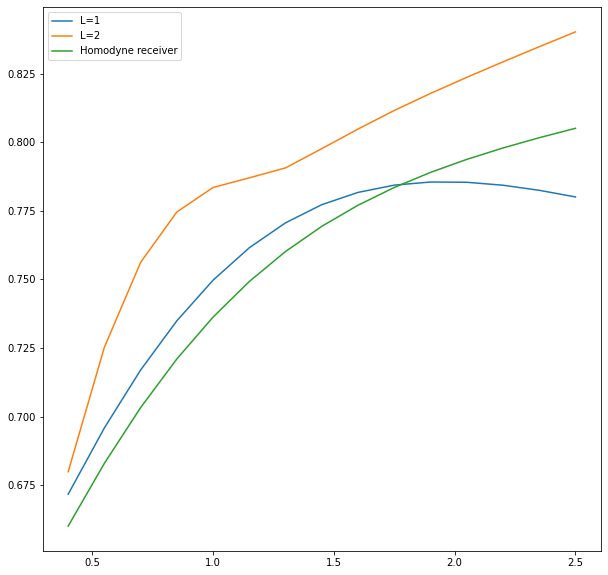

In [16]:
plt.figure(figsize=(10,10))

val=15
amplitudes = np.linspace(.4,4,25)[:val]
plt.plot(amplitudes,optvals1L[:val], label="L=1")
plt.plot(amplitudes,optvals2L[:val], label="L=2")
plt.plot(amplitudes, homos[:val], label="Homodyne receiver")
plt.legend()
#plt.savefig("raro.png")

100%|██████████| 25/25 [08:42<00:00, 20.90s/it]


In [103]:
agent =Agent(channel={"class":"compound_lossy", "params":[0.5, 0.01]})
def success_probability_3L(betas, amplitude=0.4):
    L=3
    b0, b1 ,b2,b3, b4, b5, b6 = betas
    p=0
    for n1,n2,n3 in zip(*misc.outcomes_universe(3).T):
        ph = [-1,1][np.argmax([agent.PP(ph*amplitude, b0 ,1/np.sqrt(L), n1)*agent.PP(ph*amplitude, [b1,b2][n1] ,1/np.sqrt(L), n2)*agent.PP(ph*amplitude, np.array([[b3,b4],[b5,b6]])[n1,n2] ,1/np.sqrt(L), n3) for ph in [-1,1]])]
        for att in [0.01, 1]:
            p+=agent.P(np.sqrt(att)*ph*amplitude, b0 ,1/np.sqrt(L), n1)*agent.P(np.sqrt(att)*ph*amplitude, [b1,b2][n1] ,1/np.sqrt(L), n2)*agent.PP(ph*amplitude, np.array([[b3,b4],[b5,b6]])[n1,n2] ,1/np.sqrt(L), n3) /4
    return -p

In [104]:
amplitudes = [.4, 4]
optvals3L = np.zeros(len(amplitudes))
optbetas3L = np.zeros((len(amplitudes), 7))
for inda, a in enumerate(tqdm(amplitudes)):
    blim = 4*a
    f=optimize.dual_annealing(success_probability_3L,([(-blim,blim)])*7, args=[a], maxiter=1000,no_local_search=True )
    optvals3L[inda] = -f.fun
    optbetas3L[inda] = f.x

100%|██████████| 2/2 [00:27<00:00, 13.59s/it]


In [102]:
optvals3L

array([0.45831414, 0.62227762])

In [2]:


class InterpolationModel:
    def __init__(self, priors, labels):
        self.model = interp1d(priors, labels)
    def __call__(self, unseen_point):
        if unseen_point < .5:
            return self.model(1-unseen_point)
        else:
            return self.model(unseen_point)

class RewardModel():
    def __init__(self):
        pass
    def R_function(self,postirior_plus):
        reward = np.max([postirior_plus, 1-postirior_plus])
        return reward
    def __call__(self,postiriors):
        return self.R_function(postiriors)



class SuccessProbability():
    def __init__(self, n_phases=2,amplitude=0.4, prob_ep=0.5, ep=1):
        self.n_phases = n_phases
        self.amplitude = amplitude
        self.possible_phases = np.array([-1.,1.])
        self.ep=ep
        self.prob_ep = prob_ep
        
    def NProb(self,outcome, amp,beta):
        p0=0
        for pep, ep in zip([self.prob_ep, 1-self.prob_ep],[self.ep, 1]):
            p0+= pep*np.exp(-abs(complex(np.sqrt(ep)*amp)+complex(beta))**2)
        if outcome == 0.:
            return p0
        else:
            return 1-p0

    def outcome_probability(self,outcome,prior_plus,beta,amp):
        prs = [prior_plus, 1-prior_plus]
        p=0
        for phase,pr in zip([1,-1], prs):
            p+= pr*self.NProb(outcome,phase*amp,beta)
        return p

    def postirior_probability(self,outcome, prior_plus, beta, amp):
        prob_ot = self.outcome_probability(outcome, prior_plus, beta, amp)
        return prior_plus*self.NProb(outcome, amp,beta)/prob_ot

    def J_intermmediate(self, prior_plus, beta, amplitude,next_J_interpolation):
        objective_function = 0
        for outcome in [0, 1]:
            postirior_plus = self.postirior_probability(outcome, prior_plus, beta, amplitude)
            objective_function += next_J_interpolation(postirior_plus)*self.outcome_probability(outcome, prior_plus, beta, amplitude)
        return -objective_function

for number_photodetectors in range(36,50):

    amplitude = .4
    ep=0.01
    suc = SuccessProbability(amplitude=amplitude/np.sqrt(number_photodetectors), prob_ep=.5, ep=ep)

    Npriors = 100
    priors = np.linspace(.5,1,Npriors)

    objective_functions = np.zeros((number_photodetectors+1,len(priors)))
    displacements = np.zeros((number_photodetectors,len(priors)))


    ### last layer ###
    modelito = RewardModel()
    for indp, pr in enumerate(priors):
        objective_functions[number_photodetectors, indp] = modelito(pr)

    for layer in tqdm(range(number_photodetectors)[::-1]):
        if layer == number_photodetectors-1:
            eff_amplitude=amplitude/np.sqrt(number_photodetectors)
        else:
            eff_amplitude = amplitude/np.sqrt(number_photodetectors)
        mod = InterpolationModel(priors,objective_functions[layer+1])
        for indp, pr in enumerate(priors):
            def suc1(beta):
                return suc.J_intermmediate(pr, beta[0], eff_amplitude, mod)
            f=optimize.dual_annealing(suc1, [(-1,1)], maxiter=200,no_local_search=True )
            objective_functions[layer,indp] = -f.fun
            displacements[layer,indp] = f.x[0]
            
    os.makedirs("resultsdp/{}/".format(ep),exist_ok=True)
    np.save("resultsdp/{}/{}L_objective_function".format(ep,number_photodetectors), objective_functions )
    np.save("resultsdp/{}/{}L_displacements".format(ep,number_photodetectors), objective_functions )    

  0%|          | 0/36 [00:02<?, ?it/s]


KeyboardInterrupt: 

In [6]:
value=[]
for number_photodetectors in range(1,50):
    objfun = np.load("resultsdp/{}/{}L_objective_function.npy".format(ep,number_photodetectors))
    value.append(objfun[0,0])

In [72]:
def homodyne(a=0.4, ep=0.01):
    beta = np.sqrt(ep)*a
    p_err =  (1- erf(np.sqrt(2)*a) + 1 - erf(np.sqrt(2)*beta))/4
    return 1-p_err


In [73]:
homodyne()

0.6600129867152953

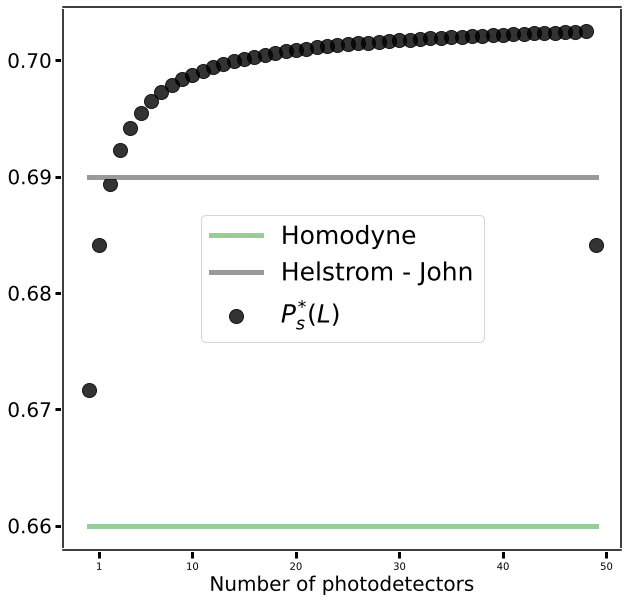

In [75]:
from helstrom import Helstrom
from math import erf

hel = Helstrom(alpha=0.4, ep = 0.01)
helstrom_avg = hel()


plt.xkcd(False)
plt.figure(figsize=(10,10))
plt.scatter(range(len(value)),value,alpha=0.8,color="black",s=200, label="$P^{*}_{s}(L)$")
ticks=[1, 10, 20, 30, 40, 50]
plt.xticks(ticks,[str(t) for t in ticks],size=10)
plt.xlabel("Number of photodetectors",size=20)
plt.yticks(size=20)
plt.plot(range(len(value)), np.ones(len(value))*homodyne(0.4,ep=0.01), linewidth=5, color="green",alpha=0.4, label="Homodyne")
plt.plot(range(len(value)), np.ones(len(value))*0.69, color="black", linewidth=5,alpha=0.4, label="Helstrom - John")
plt.legend(prop={"size":25}, loc="best")
plt.savefig("problema.png")
#plt.title(r'$\alpha = 0.4$'+"\n"+r'$\epsilon = 0.01$', size=30)
#plt.savefig("figures_iee/comparison_fixed_energy_and_damping.pdf")

In [61]:
def helly(amplitude):
    return (1 + np.sqrt(1-np.exp(-4*(amplitude**2))))/2

In [62]:
amplitude = 0.4
helly(amplitude)

0.8437686634776909

In [63]:
hel = Helstrom(alpha=0.4, ep = 0.01)
helstrom_avg = hel()
helstrom_avg

0.7222374638505551

In [58]:
hel.alpha

0.4

In [4]:
import numpy as np

from bokeh.layouts import column, row
from bokeh.models import CustomJS, Slider
from bokeh.plotting import ColumnDataSource, figure, output_file, show

x = np.linspace(0, 10, 500)
y = np.sin(x)

source = ColumnDataSource(data=dict(x=x, y=y))

plot = figure(y_range=(-10, 10), plot_width=400, plot_height=400)

plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

amp_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Amplitude")
freq_slider = Slider(start=0.1, end=10, value=1, step=.1, title="Frequency")
phase_slider = Slider(start=0, end=6.4, value=0, step=.1, title="Phase")
offset_slider = Slider(start=-5, end=5, value=0, step=.1, title="Offset")

callback = CustomJS(args=dict(source=source, amp=amp_slider, freq=freq_slider, phase=phase_slider, offset=offset_slider),
                    code="""
    const data = source.data;
    const A = amp.value;
    const k = freq.value;
    const phi = phase.value;
    const B = offset.value;
    const x = data['x']
    const y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = B + A*Math.sin(k*x[i]+phi);
    }
    source.change.emit();
""")

amp_slider.js_on_change('value', callback)
freq_slider.js_on_change('value', callback)
phase_slider.js_on_change('value', callback)
offset_slider.js_on_change('value', callback)

layout = row(
    plot,
    column(amp_slider, freq_slider, phase_slider, offset_slider),
)

output_file("slider.html", title="slider.py example")

show(layout)

In [5]:
import numpy as np

from bokeh.io import show
from bokeh.layouts import column, row
from bokeh.models import Spinner
from bokeh.plotting import figure

x = np.random.rand(10)
y = np.random.rand(10)

p = figure(x_range=(0, 1), y_range=(0, 1))
points = p.scatter(x=x, y=y, size=4)

spinner = Spinner(title="Glyph size", low=1, high=40, step=0.5, value=4, width=80)
spinner.js_link('value', points.glyph, 'size')

show(row(column(spinner, width=100), p))